[View in Colaboratory](https://colab.research.google.com/github/balajikulkarni/Deep_Learning/blob/master/MNIST_DNN_Keras.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


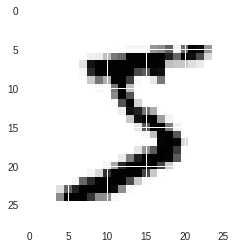

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)



In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [0]:
Y_train[:10]


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(filters = 32,kernel_size =(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(filters = 32,kernel_size =(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Convolution2D(filters = 16,kernel_size =(3,3), activation='relu'))
model.add(Convolution2D(filters = 16,kernel_size =(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=12, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/12
60000/60000 [==============================] - 21s 348us/step - loss: 0.2244 - acc: 0.9278
Epoch 2/12
60000/60000 [==============================] - 19s 318us/step - loss: 0.0716 - acc: 0.9783
Epoch 3/12
60000/60000 [==============================] - 19s 318us/step - loss: 0.0547 - acc: 0.9829
Epoch 4/12
60000/60000 [==============================] - 19s 322us/step - loss: 0.0454 - acc: 0.9859
Epoch 5/12
60000/60000 [==============================] - 20s 328us/step - loss: 0.0388 - acc: 0.9880
Epoch 6/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0354 - acc: 0.9885
Epoch 7/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.0322 - acc: 0.9896
Epoch 8/12
60000/60000 [==============================] - 20s 328us/step - loss: 0.0295 - acc: 0.9908
Epoch 9/12
60000/60000 [==============================] - 19s 324us/step - loss: 0.0266 - acc: 0.9915
Epoch 10/12
60000/60000 [==============================] - 19s 325us/step - loss: 

In [0]:
model.save_weights("Session-3-Assignment-A.h5")

In [16]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 114us/step


In [17]:
print(score)

[0.024174537597104792, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[3.1049756e-13 6.7725998e-12 1.7028346e-07 8.5355751e-08 2.2385458e-14
  1.3289116e-12 2.1890147e-21 9.9999976e-01 3.6472982e-12 3.7339696e-08]
 [1.0735236e-08 8.1118793e-07 9.9999893e-01 1.0408535e-09 1.6038101e-08
  1.8830262e-11 3.0338239e-08 1.3609054e-11 1.8345938e-07 1.9411368e-11]
 [4.0545545e-09 9.9980575e-01 7.5287448e-06 5.6742536e-08 9.6026932e-05
  9.3182571e-06 2.0950938e-06 7.4346302e-05 4.7641724e-06 1.4638272e-07]
 [9.9995816e-01 1.2693005e-12 1.2323762e-08 4.3649733e-11 1.9855050e-11
  1.3578360e-09 4.1773437e-05 5.8840940e-12 9.0478046e-08 8.0293610e-08]
 [2.4469568e-13 1.2999440e-12 1.4773274e-10 2.2942265e-13 1.0000000e+00
  2.4274302e-15 3.5319477e-13 1.8824347e-12 3.9026872e-12 6.8232304e-09]
 [1.8787798e-08 9.9916101e-01 2.0303714e-05 1.8553052e-08 9.4313087e-05
  1.1886115e-07 7.8285026e-08 7.2134897e-04 2.4448425e-06 3.3520047e-07]
 [2.4808766e-18 9.6440180e-09 1.1110617e-08 2.3484841e-14 9.9999833e-01
  3.4926614e-11 6.0839302e-15 5.4489586e-09 1.5861836e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored